<a href="https://colab.research.google.com/github/person-with-a-sharp-stick/Math-342w-lab/blob/main/Math-342w-lab/Math%20342w%20Final%20Project/Math_342w_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# importing dependencies
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error # calculates RMSE
from google.colab.data_table import DataTable
DataTable.max_columns = 60

# Data viz
import seaborn as sns
sns.set_palette(sns.color_palette("colorblind")) # setting color palette
sns.set(rc={"figure.figsize":(10, 6)}) #width=10, #height=6

# if you get an error when you try to import missingpy in the cell below try this code
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#import missingno for dataset checking
import missingno as msno

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [25]:
!pip install missingpy
!pip install MissForest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# import MissForest
from missingpy import MissForest

In [27]:
url = "https://raw.githubusercontent.com/kapelner/QC_MATH_342W_Spring_2022/main/writing_assignments/housing_data_2016_2017.csv"
df = pd.read_csv(url, parse_dates = ["date_of_sale"])

# snapshot
df

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,num_half_bathrooms,num_total_rooms,parking_charges,pct_tax_deductibl,sale_price,sq_footage,total_taxes,walk_score,listing_price_to_nearest_1000,url
0,3OID399FXG7F26JWONXF0Y86J90FD4,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:37 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,5.0,NaN,NaN,"$228,000",NaN,NaN,82,NaN,NaN
1,3MQY1YVHS3K2MF90MWR2LPQH7KJ2B0,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:37 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,4.0,NaN,NaN,"$235,500",890.0,NaN,89,NaN,NaN
2,3DGDV62G7O94Q9AA5193G9V6OOY2PL,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:41 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,3.0,NaN,NaN,"$137,550",550.0,"$5,500",90,NaN,NaN
3,3087LXLJ6MGL3MI2CB9KLRONPKRF0B,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:33 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,5.0,NaN,NaN,"$545,000",NaN,"$2,260",94,NaN,NaN
4,3FULMHZ7OUX88KSKHZ0ZSKY93XJ4MN,36BILMLQB75QQNBTYKGYCZWDN8TVAU,Find Information about Housing To Help a Stude...,Go to a link and copy information into the HIT,NaN,$0.05,Wed Feb 15 22:13:38 PST 2017,1.0,BatchId:2689947;OriginalHitTemplateId:920937336;,900.0,...,NaN,4.0,NaN,39.0,"$241,700",675.0,NaN,71,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,"$3,588",97,$628,http://www.mlsli.com/homes-for-sale/address-no...
2226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,$99,NaN,NaN,NaN,"$5,100",82,$988,http://www.mlsli.com/homes-for-sale/One-Bay-Cl...
2227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,1500.0,$250,96,$850,http://www.mlsli.com/homes-for-sale/address-no...
2228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,1600.0,$250,96,$850,http://www.mlsli.com/homes-for-sale/address-no...


In [28]:
df = df.drop(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward', 'CreationTime', 'MaxAssignments', 'RequesterAnnotation', 'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds', 'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds', 'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime', 'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime', 'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate', 'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'URL', 'url', 'date_of_sale'], axis = 1) #drop junk data

In [29]:
df['zipcode'] = df['full_address_or_zip_code'].str.extract(r'(\d{5}\-?\d{0,4})') #A big thank you to Lamae for your regex code!

In [30]:
df = df.drop(['full_address_or_zip_code'], axis = 1) #get rid of dup

In [31]:
prune_df = df.dropna(subset=['sale_price', 'listing_price_to_nearest_1000'], how='all') #Merge the columns

In [32]:
M = prune_df.copy()
M = M.isna().astype(int) #Create df of missing data

In [33]:
# select only columns with missing values
M = M.loc[:, M.sum(0) > 0]

In [34]:
M = M.drop(['sale_price', 'listing_price_to_nearest_1000'], axis = 1) #Drop missing y's as they cover each other

In [35]:
snip_df = prune_df.drop(['sale_price', 'listing_price_to_nearest_1000'], axis = 1) #drop ys

In [36]:
clean_prune_sale = prune_df['sale_price']
clean_prune_sale = clean_prune_sale.replace('[\$,]', '', regex=True).astype(float) #getting rid of $ from the strings

In [37]:
clean_prune_1000 = prune_df['listing_price_to_nearest_1000']
clean_prune_1000 = clean_prune_1000.replace('[\$,]', '', regex=True).astype(float) #get rid of $
clean_prune_1000_mult = clean_prune_1000.multiply(other = 1000)

In [38]:
tempDF = pd.concat([clean_prune_sale, clean_prune_1000_mult], axis = 1) #remerge

In [39]:
fill_df = tempDF['sale_price'].combine_first(tempDF['listing_price_to_nearest_1000'])

In [40]:
together_df = pd.concat([snip_df, fill_df], axis = 1) 

In [41]:
cats = pd.get_dummies(together_df['cats_allowed'])
condo = pd.get_dummies(together_df['coop_condo'])
droom = pd.get_dummies(together_df['dining_room_type']) #Dummify categoricals
dogs = pd.get_dummies(together_df['dogs_allowed'])
fuel = pd.get_dummies(together_df['fuel_type'])
garag = pd.get_dummies(together_df['garage_exists'])
kit = pd.get_dummies(together_df['kitchen_type'])
mod = pd.get_dummies(together_df['model_type'])

In [42]:
together_drop_df = together_df.drop(['cats_allowed', 'coop_condo', 'dining_room_type', 'dogs_allowed', 'fuel_type', 'garage_exists', 'kitchen_type', 'model_type'], axis = 1)

In [43]:
together_drop_df[together_drop_df.columns[1:]] = together_drop_df[together_drop_df.columns[1:]].replace('[\$,]', '', regex=True).astype(float) # cut off dollars

In [44]:
together_drop_df = pd.concat([together_drop_df, condo, fuel], axis = 1) #add in fuel, and condos

In [45]:
together_drop_df['garage_exists'] = garag.sum(axis=1) #add in garages

In [46]:
together_drop_df = pd.concat([together_drop_df, M], axis = 1) # including M

In [47]:
# Make an instance and perform the imputation
# there are several criterion, check docs for others
imputer = MissForest(criterion="squared_error")
together_imputed = imputer.fit_transform(together_drop_df)

# cast as dataframe with appropriate column names
together_imputed = pd.DataFrame(together_imputed, columns = together_drop_df.columns)

# snapshot
together_imputed

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


,approx_year_built,common_charges,community_district_num,maintenance_cost,num_bedrooms,num_floors_in_building,num_full_bathrooms,num_half_bathrooms,num_total_rooms,parking_charges,...,model_type,num_bedrooms,num_floors_in_building,num_half_bathrooms,num_total_rooms,parking_charges,pct_tax_deductibl,sq_footage,total_taxes,zipcode
0,1955.0,767.00,25.0,853.69,2.0,6.00,1.0,1.31,5.0,28.25,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,1955.0,376.62,25.0,604.00,1.0,7.00,1.0,1.00,4.0,101.50,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2004.0,167.00,24.0,308.06,1.0,1.00,1.0,0.19,3.0,170.80,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2002.0,275.00,25.0,353.14,3.0,3.45,2.0,0.96,5.0,161.22,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,1949.0,365.91,26.0,660.00,2.0,2.00,1.0,1.26,4.0,35.41,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,1987.0,480.00,25.0,432.66,2.0,7.00,1.0,1.00,4.0,82.78,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2220,1983.0,956.00,25.0,1508.98,2.0,19.23,2.0,0.46,5.0,99.00,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2221,2010.0,250.00,24.0,1273.24,3.0,4.33,2.0,0.84,6.0,209.38,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2222,2010.0,250.00,24.0,1301.58,3.0,4.00,2.0,1.00,6.0,209.29,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [48]:
together_sk_y = together_imputed['sale_price'] #seperate out the sale price
together_sk_x = together_imputed.drop(['sale_price'], axis = 1)

In [49]:
together_sk_x_train, together_sk_x_test, together_sk_y_train, together_sk_y_test = train_test_split(together_sk_x, together_sk_y, test_size = 0.2) #train test split

In [50]:
# fitting model
together_model = LinearRegression(fit_intercept = True) #lin reg
together_model.fit(together_sk_x_train, together_sk_y_train)

# get yhat
together_yhat = together_model.predict(together_sk_x_test)

# RMSE
print(mean_squared_error(y_true = together_sk_y_test, y_pred = together_yhat, squared = False))

# R^2
print(together_model.score(together_sk_x_test, together_sk_y_test))

111738.33789114156
0.6528404019117482


In [51]:
# fitting regression tree
from sklearn.tree import DecisionTreeRegressor 
  
# make an instance of the Model
together_clf = DecisionTreeRegressor() #,random_state = 0 makes it deterministic
  
# train the model on the data
together_clf.fit(together_sk_x_train, together_sk_y_train)

DecisionTreeRegressor()

In [52]:
# get in sample predictions
together_yhat_in_sample = together_clf.predict(together_sk_x_train) #CART

# get oos predictions
together_yhat_oos = together_clf.predict(together_sk_x_test)

# IN SAMPLE
print(f"In sample R^2: {round(together_clf.score(together_sk_x_train, together_sk_y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=together_sk_y_train, y_pred=together_yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(together_clf.score(together_sk_x_test, together_sk_y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=together_sk_y_test, y_pred=together_yhat_oos, squared=False), 6)}")

In sample R^2: 0.999999
In sample RMSE 193.582635
OOS R^2: 0.882471
OOS RMSE 65014.531372


In [53]:
forest_model = RandomForestClassifier(n_estimators = 100, oob_score = True) #n_estimators=100, oob_score = True
forest_model.fit(together_sk_x_train, together_sk_y_train)

RandomForestClassifier(oob_score=True)

In [54]:
forest_yhat_in_sample = forest_model.predict(together_sk_x_train) #Random Forest
forest_yhat_oos = forest_model.predict(together_sk_x_test)

In [55]:
# IN SAMPLE
print(f"In sample R^2: {round(forest_model.score(together_sk_x_train, together_sk_y_train), 6)}")
print(f"In sample RMSE {round(mean_squared_error(y_true=together_sk_y_train, y_pred=together_yhat_in_sample, squared=False), 6)}")

# OOS
print(f"OOS R^2: {round(forest_model.score(together_sk_x_test, together_sk_y_test), 6)}")
print(f"OOS RMSE {round(mean_squared_error(y_true=together_sk_y_test, y_pred=forest_yhat_oos, squared=False), 6)}")

In sample R^2: 0.999438
In sample RMSE 193.582635
OOS R^2: 0.537079
OOS RMSE 63011.451478


In [56]:
is_lin_reg_R2 = []
is_lin_reg_RMSE = []
lin_reg_R2 = []
lin_reg_RMSE = []
reg_tree_R2 = []
reg_tree_RMSE = []
rand_forest_R2 = []
rand_forest_RMSE = []
for i in range(125):
  together_sk_x_train, together_sk_x_test, together_sk_y_train, together_sk_y_test = train_test_split(together_sk_x, together_sk_y, test_size = 0.2)    ####Run everything 125 times and store the results
  
  ### THIS IS LOG REG###

  # fitting model
  together_model = LinearRegression(fit_intercept = True)
  together_model.fit(together_sk_x_train, together_sk_y_train)

  is_lin_reg_R2.append(together_model.score(together_sk_x_train, together_sk_y_train))
  is_yhat = together_model.predict(together_sk_x_train)
  is_lin_reg_RMSE.append(mean_squared_error(y_true = together_sk_y_train, y_pred = is_yhat, squared = False))
  

  # get yhat
  together_yhat = together_model.predict(together_sk_x_test)

  # RMSE
  lin_reg_RMSE.append(mean_squared_error(y_true = together_sk_y_test, y_pred = together_yhat, squared = False))

  # R^2
  lin_reg_R2.append(together_model.score(together_sk_x_test, together_sk_y_test))
  ######

  ### THIS IS REG TREE ###

  # make an instance of the Model
  together_clf = DecisionTreeRegressor() #,random_state = 0 makes it deterministic
  
  # train the model on the data
  together_clf.fit(together_sk_x_train, together_sk_y_train)

  # get in sample predictions
  together_yhat_in_sample = together_clf.predict(together_sk_x_train)

  # get oos predictions
  together_yhat_oos = together_clf.predict(together_sk_x_test)



  # OOS
  reg_tree_R2.append(round(together_clf.score(together_sk_x_test, together_sk_y_test), 6))
  reg_tree_RMSE.append(round(mean_squared_error(y_true=together_sk_y_test, y_pred=together_yhat_oos, squared=False), 6))
  ######


  ### Random forest ###
  forest_model = RandomForestClassifier(n_estimators = 100, oob_score = True) #n_estimators=100, oob_score = True
  forest_model.fit(together_sk_x_train, together_sk_y_train)
  forest_yhat_in_sample = forest_model.predict(together_sk_x_train)
  forest_yhat_oos = forest_model.predict(together_sk_x_test)



  # OOS
  rand_forest_R2.append(round(forest_model.score(together_sk_x_test, together_sk_y_test), 6))
  rand_forest_RMSE.append(round(mean_squared_error(y_true=together_sk_y_test, y_pred=forest_yhat_oos, squared=False), 6))

In [57]:
importance = together_model.coef_ #https://machinelearningmastery.com/calculate-feature-importance-with-python/
for i,v in enumerate(importance):
  if (i < 25):
	  print('Feature: %0d, Score: %.5f' % (i,v)) #Show importance coefficients of linear model
  else:
    print('Missing Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 256.79147
Feature: 1, Score: -2.63540
Feature: 2, Score: 1302.74823
Feature: 3, Score: 86.30295
Feature: 4, Score: 51079.82654
Feature: 5, Score: 5011.27234
Feature: 6, Score: 64667.85864
Feature: 7, Score: 60457.19807
Feature: 8, Score: -7718.48957
Feature: 9, Score: 323.92012
Feature: 10, Score: -523.35714
Feature: 11, Score: 91.75827
Feature: 12, Score: 4.11678
Feature: 13, Score: 1761.27332
Feature: 14, Score: 5.08096
Feature: 15, Score: -90457.44211
Feature: 16, Score: 90457.44211
Feature: 17, Score: 95296.24295
Feature: 18, Score: -7044.13855
Feature: 19, Score: -18650.76416
Feature: 20, Score: -8045.86693
Feature: 21, Score: -29688.89120
Feature: 22, Score: -4767.95758
Feature: 23, Score: 5870.59758
Feature: 24, Score: 36747.41980
Missing Feature: 25, Score: 8856.43310
Missing Feature: 26, Score: -3215.40858
Missing Feature: 27, Score: -8672.04829
Missing Feature: 28, Score: -27098.62453
Missing Feature: 29, Score: -5870.59758
Missing Feature: 30, Score: -8569

In [58]:
number = 0
for col in together_imputed.columns: #https://machinelearningmastery.com/calculate-feature-importance-with-python/
  if (col != 'sale_price'):
    if(number < 25):
      print(number, ": ", col)  #list the features
      number += 1
    else:
        print(number - 1, ": Missing ", col)
        number += 1
  else:
    number += 1

0 :  approx_year_built
1 :  common_charges
2 :  community_district_num
3 :  maintenance_cost
4 :  num_bedrooms
5 :  num_floors_in_building
6 :  num_full_bathrooms
7 :  num_half_bathrooms
8 :  num_total_rooms
9 :  parking_charges
10 :  pct_tax_deductibl
11 :  sq_footage
12 :  total_taxes
13 :  walk_score
14 :  zipcode
16 :  co-op
17 :  condo
18 :  Other
19 :  electric
20 :  gas
21 :  none
22 :  oil
23 :  other
24 :  garage_exists
24 : Missing  approx_year_built
25 : Missing  common_charges
26 : Missing  community_district_num
27 : Missing  dining_room_type
28 : Missing  fuel_type
29 : Missing  garage_exists
30 : Missing  kitchen_type
31 : Missing  maintenance_cost
32 : Missing  model_type
33 : Missing  num_bedrooms
34 : Missing  num_floors_in_building
35 : Missing  num_half_bathrooms
36 : Missing  num_total_rooms
37 : Missing  parking_charges
38 : Missing  pct_tax_deductibl
39 : Missing  sq_footage
40 : Missing  total_taxes
41 : Missing  zipcode


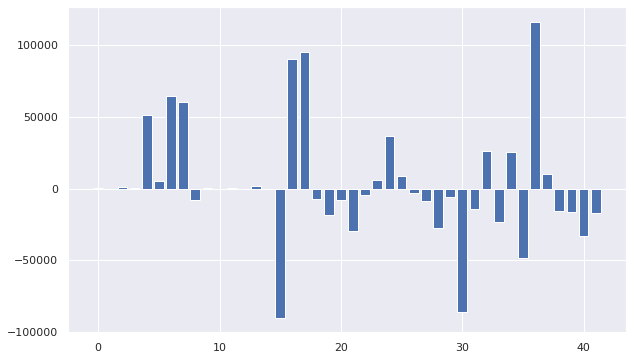

In [59]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance) #show the importance of lin model
plt.show()

In [60]:
from sklearn import tree
text_representation = tree.export_text(together_clf) #Represent the tree as ASCII 
print(text_representation)

|--- feature_6 <= 1.50
|   |--- feature_15 <= 0.50
|   |   |--- feature_11 <= 679.50
|   |   |   |--- feature_14 <= 11355.50
|   |   |   |   |--- feature_5 <= 6.38
|   |   |   |   |   |--- feature_8 <= 2.50
|   |   |   |   |   |   |--- value: [545000.00]
|   |   |   |   |   |--- feature_8 >  2.50
|   |   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |   |   |--- feature_12 <= 187.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 163.00
|   |   |   |   |   |   |   |   |   |--- feature_12 <= 58.50
|   |   |   |   |   |   |   |   |   |   |--- value: [295500.00]
|   |   |   |   |   |   |   |   |   |--- feature_12 >  58.50
|   |   |   |   |   |   |   |   |   |   |--- value: [293000.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  163.00
|   |   |   |   |   |   |   |   |   |--- value: [250000.00]
|   |   |   |   |   |   |   |--- feature_12 >  187.00
|   |   |   |   |   |   |   |   |--- feature_13 <= 95.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 2.50
|   | 

Feature: 0, Score: 0.00893
Feature: 1, Score: 0.01420
Feature: 2, Score: 0.01145
Feature: 3, Score: 0.02294
Feature: 4, Score: 0.00328
Feature: 5, Score: 0.04187
Feature: 6, Score: 0.35189
Feature: 7, Score: 0.05247
Feature: 8, Score: 0.01156
Feature: 9, Score: 0.00918
Feature: 10, Score: 0.02145
Feature: 11, Score: 0.14902
Feature: 12, Score: 0.01430
Feature: 13, Score: 0.05419
Feature: 14, Score: 0.05151
Feature: 15, Score: 0.15398
Feature: 16, Score: 0.01288
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00098
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00075
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00022
Feature: 24, Score: 0.00003
Missing Feature: 25, Score: 0.00158
Missing Feature: 26, Score: 0.00000
Missing Feature: 27, Score: 0.00236
Missing Feature: 28, Score: 0.00087
Missing Feature: 29, Score: 0.00047
Missing Feature: 30, Score: 0.00000
Missing Feature: 31, Score: 0.00099
Missing Feature: 32, Score: 0.00019
Missing Feature: 33, S

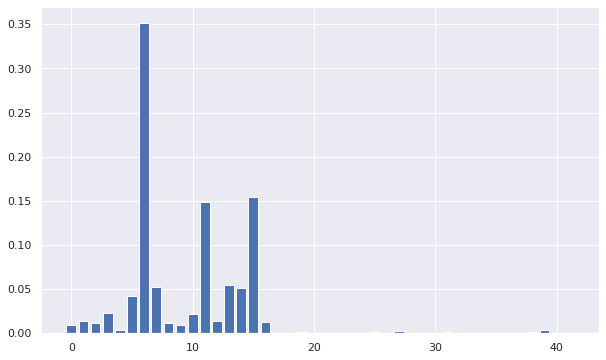

In [61]:
importance = together_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  if (i < 25):
	  print('Feature: %0d, Score: %.5f' % (i,v))   #Importance of each part
  else:
    print('Missing Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [62]:
def Average(lst):
    return sum(lst) / len(lst)

In [63]:
is_avg_lin_reg_R2 = round(Average(is_lin_reg_R2), 6)
is_avg_lin_reg_RMSE = round(Average(is_lin_reg_RMSE), 6)    #take average of each array
avg_lin_reg_R2 = round(Average(lin_reg_R2), 6)
avg_lin_reg_RMSE = round(Average(lin_reg_RMSE), 6)
avg_reg_tree_R2 = round(Average(reg_tree_R2), 6)
avg_reg_tree_RMSE = round(Average(reg_tree_RMSE), 6)
avg_rand_for_R2 = round(Average(rand_forest_R2), 6)
avg_rand_for_RMSE = round(Average(rand_forest_RMSE), 6)

In [64]:
print("Linear Regression i.s.: R2: " , is_avg_lin_reg_R2, " i.s. RMSE: ", is_avg_lin_reg_RMSE) ### R2 AND RMSE ###
print("Linear Regression: R2: " , avg_lin_reg_R2 , "  RMSE: " , avg_lin_reg_RMSE)
print("Regression Tree: R2: " , avg_reg_tree_R2 , "  RMSE: " , avg_reg_tree_RMSE)
print("Random Forest: R2: " , avg_rand_for_R2 , "  RMSE: " , avg_rand_for_RMSE)

Linear Regression i.s.: R2:  0.738076  i.s. RMSE:  100919.368328
Linear Regression: R2:  0.720726   RMSE:  105240.29383
Regression Tree: R2:  0.883097   RMSE:  67318.44406
Random Forest: R2:  0.573258   RMSE:  59027.968266


The holdoff set

In [65]:
temp_x_train, x_holdout, temp_y_train, y_holdout = train_test_split(together_sk_x, together_sk_y, test_size = 0.2)
for i in range(15):
  final_x_train, final_x_test, final_y_train, final_y_test = train_test_split(temp_x_train, temp_y_train, test_size = 0.2) #Do holdoff, 15 iterations this time for sanity
  forest_model = RandomForestClassifier(n_estimators = 100, oob_score = True) 
  forest_model.fit(final_x_train, final_y_train)
  forest_yhat_in_sample = forest_model.predict(final_x_train)
  forest_yhat_oos = forest_model.predict(final_x_test)

In [66]:
final_R2 = []
final_RMSE = []
for i in range(15):
  forest_yhat_in_sample = forest_model.predict(x_holdout)
  forest_yhat_oos = forest_model.predict(x_holdout)


  # OOS
  final_R2.append(round(forest_model.score(x_holdout, y_holdout), 6))
  final_RMSE.append(round(mean_squared_error(y_true=y_holdout, y_pred=forest_yhat_oos, squared=False), 6))

In [67]:
avg_fin_R2 = Average(final_R2)
avg_fin_RMSE = Average(final_RMSE)

In [68]:
print("R2: ", avg_fin_R2, " RMSE: ", avg_fin_RMSE)

R2:  0.460674  RMSE:  94120.38094400002
